Task 5: Model Evaluation

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Logistic Regression Confusion Matrix:
[[933 103]
 [151 222]]
Logistic Regression AUC Score: 0.86
Logistic Regression Accuracy: 0.82
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409

Decision Tree Confusion Matrix:
[[964  72]
 [201 172]]
Decision Tree AUC Score: 0.85
Decision Tree Accuracy: 0.81
Random Forest Classi

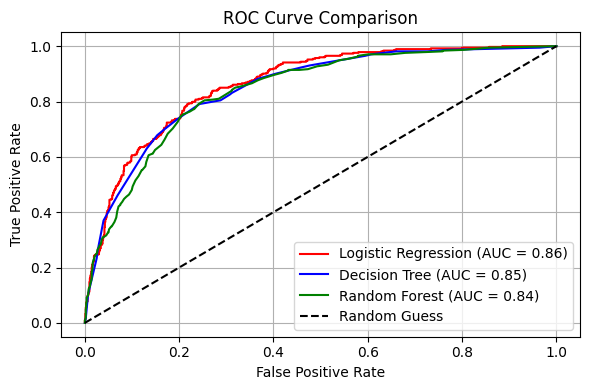

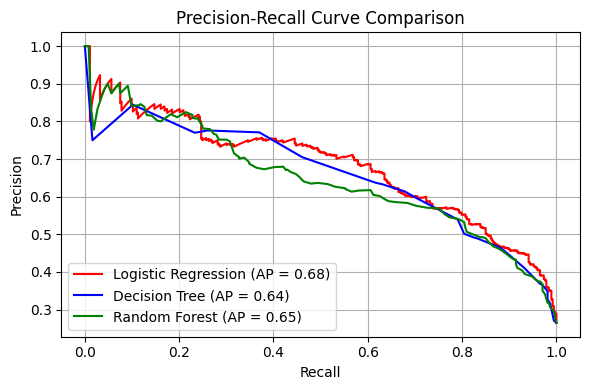

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score

# Model Evaluation

def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name="Model"):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  roc_auc = auc(fpr, tpr)

  print(f"{model_name} Classification Report:")
  print(classification_report(y_test, y_pred))
  print(f"{model_name} Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print(f"{model_name} AUC Score: {roc_auc:.2f}")
  print(f"{model_name} Accuracy: {model.score(X_test, y_test):.2f}")
  return model_name, roc_auc, accuracy_score(y_test, y_pred)

results = []

# Scaled models
for name, model in models_scaled.items():
    results.append(train_and_evaluate(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name=name))

# Unscaled models
for name, model in models_unscaled.items():
    results.append(train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name=name))

summary_df = pd.DataFrame(results, columns=["Model", "AUC", "Accuracy"])
summary_df.to_excel("model_comparison.xlsx", index=False)

def get_confusion_details(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return pd.Series({
        "True Positives": tp,
        "False Positives": fp,
        "False Negatives": fn,
        "True Negatives": tn
    })

confusion_details = pd.DataFrame({
    "Logistic Regression": get_confusion_details(y_test, y_lr_pred),
    "Decision Tree": get_confusion_details(y_test, y_dt_pred),
    "Random Forest": get_confusion_details(y_test, y_rf_pred)
})

confusion_details.to_excel("confusion_breakdown.xlsx")

# ROC Curve
# Logistic Regression
lr.fit(X_train, y_train)
y_lr_prob = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_lr_prob)
auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree ROC
y_dt_prob = grid.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_dt_prob)
auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest ROC
y_rf_prob = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rf_prob)
auc_rf = auc(fpr_rf, tpr_rf)

# Plotting both ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='red')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve_comparison.png")
plt.show()

def plot_pr_curve(y_true, y_probs, label, color):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    avg_prec = average_precision_score(y_true, y_probs)
    plt.plot(recall, precision, label=f"{label} (AP = {avg_prec:.2f})", color=color)

plt.figure(figsize=(6, 4))
plot_pr_curve(y_test, y_lr_prob, "Logistic Regression", "red")
plot_pr_curve(y_test, y_dt_prob, "Decision Tree", "blue")
plot_pr_curve(y_test, y_rf_prob, "Random Forest", "green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig("precision_recall_curve.png")
plt.show()



AUC Scores:
Logistic Regression AUC: 0.86
Decision Tree AUC: 0.85
Random Forest AUC: 0.84
Accuracy Scores:
Logistic Regression Accuracy: 0.82
Decision Tree Accuracy: 0.81
Random Forest Accuracy: 0.79
Precision Scores:
Logistic Regression Precision: 0.68
Decision Tree Precision: 0.70
Random Forest Precision: 0.65
Recall Scores:
Logistic Regression Recall: 0.60
Decision Tree Recall: 0.46
Random Forest Recall: 0.46
F1 Scores:
Logistic Regression F1 Score: 0.64
Decision Tree F1 Score: 0.56
Random Forest F1 Score: 0.54
Support:
Logistic Regression Support: 1409
Decision Tree Support: 1409
Random Forest Support: 1409


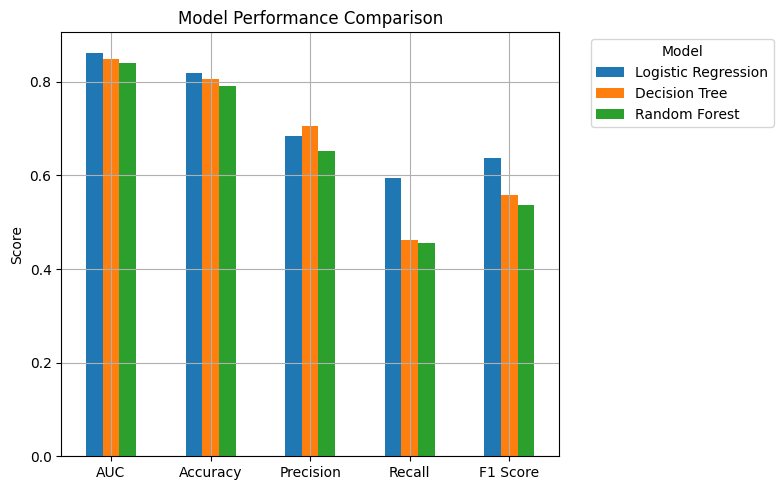

In [33]:
# AUC Scores
auc_lr = auc(*roc_curve(y_test, y_lr_prob)[:2])
auc_dt = auc(*roc_curve(y_test, y_dt_prob)[:2])
auc_rf = auc(*roc_curve(y_test, y_rf_prob)[:2])
print(f"AUC Scores:\nLogistic Regression AUC: {auc_lr:.2f}\nDecision Tree AUC: {auc_dt:.2f}\nRandom Forest AUC: {auc_rf:.2f}")

# Accuracy Scores
acc_lr = accuracy_score(y_test, y_lr_pred)
acc_dt = accuracy_score(y_test, y_dt_pred)
acc_rf = accuracy_score(y_test, y_rf_pred)
print(f"Accuracy Scores:\nLogistic Regression Accuracy: {acc_lr:.2f}\nDecision Tree Accuracy: {acc_dt:.2f}\nRandom Forest Accuracy: {acc_rf:.2f}")

# Precision Score
prec_lr = precision_score(y_test, y_lr_pred)
prec_dt = precision_score(y_test, y_dt_pred)
prec_rf = precision_score(y_test, y_rf_pred)
print(f"Precision Scores:\nLogistic Regression Precision: {prec_lr:.2f}\nDecision Tree Precision: {prec_dt:.2f}\nRandom Forest Precision: {prec_rf:.2f}")

# Recall Score
rec_lr = recall_score(y_test, y_lr_pred)
rec_dt = recall_score(y_test, y_dt_pred)
rec_rf = recall_score(y_test, y_rf_pred)
print(f"Recall Scores:\nLogistic Regression Recall: {rec_lr:.2f}\nDecision Tree Recall: {rec_dt:.2f}\nRandom Forest Recall: {rec_rf:.2f}")

#  F1 Score
f1_lr = f1_score(y_test, y_lr_pred)
f1_dt = f1_score(y_test, y_dt_pred)
f1_rf = f1_score(y_test, y_rf_pred)
print(f"F1 Scores:\nLogistic Regression F1 Score: {f1_lr:.2f}\nDecision Tree F1 Score: {f1_dt:.2f}\nRandom Forest F1 Score: {f1_rf:.2f}")

# Support
support_lr = len(y_test[y_test == 0]) + len(y_test[y_test == 1])
support_dt = len(y_test[y_test == 0]) + len(y_test[y_test == 1])
support_rf = len(y_test[y_test == 0]) + len(y_test[y_test == 1])
print(f"Support:\nLogistic Regression Support: {support_lr}\nDecision Tree Support: {support_dt}\nRandom Forest Support: {support_rf}")

# Summary Table
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'AUC': [auc_lr, auc_dt, auc_rf],
    'Accuracy': [acc_lr, acc_dt, acc_rf],
    'Precision': [prec_lr, prec_dt, prec_rf],
    'Recall': [rec_lr, rec_dt, rec_rf],
    'F1 Score': [f1_lr, f1_dt, f1_rf],
    'Support': [support_lr, support_dt, support_rf]
})

# Transpose for plotting
summary_plot = summary.set_index('Model').T


# Transpose confusion_details to match summary format
confusion_transposed = confusion_details.T.reset_index().rename(columns={'index': 'Model'})

# Merge on 'Model'
merged_summary = pd.merge(summary, confusion_transposed, on='Model')

# Export to Excel
merged_summary.to_excel("merged_model_summary.xlsx", index=False)

# Plot
summary_plot.drop(index='Support').plot(kind='bar', figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.savefig("model_performance_bar_chart.png")
plt.show()


    Threshold  Precision    Recall        F1  Support
0        0.00   0.264727  1.000000  0.418631     1409
1        0.05   0.340824  0.975871  0.505205     1409
2        0.10   0.380749  0.954424  0.544343     1409
3        0.15   0.432193  0.914209  0.586919     1409
4        0.20   0.462518  0.876676  0.605556     1409
5        0.25   0.502471  0.817694  0.622449     1409
6        0.30   0.552326  0.764075  0.641170     1409
7        0.35   0.583524  0.683646  0.629630     1409
8        0.40   0.602067  0.624665  0.613158     1409
9        0.45   0.622356  0.552279  0.585227     1409
10       0.50   0.640741  0.463807  0.538103     1409
11       0.55   0.679654  0.420912  0.519868     1409
12       0.60   0.703911  0.337802  0.456522     1409
13       0.65   0.746753  0.308311  0.436433     1409
14       0.70   0.781513  0.249330  0.378049     1409
15       0.75   0.821053  0.209115  0.333333     1409
16       0.80   0.805195  0.166220  0.275556     1409
17       0.85   0.846154  0.

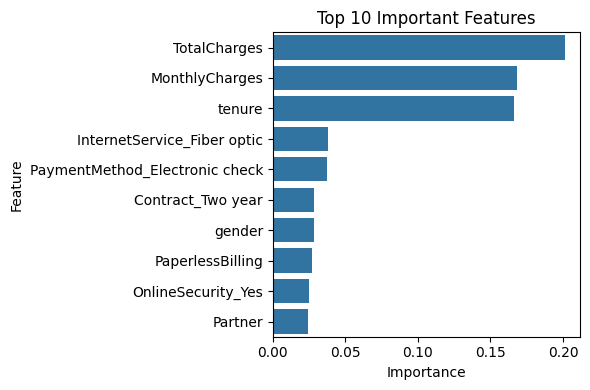

Top 10 Important Features:
                           Feature  Importance
8                     TotalCharges    0.201664
7                   MonthlyCharges    0.168213
4                           tenure    0.166581
11     InternetService_Fiber optic    0.038111
28  PaymentMethod_Electronic check    0.037589
26               Contract_Two year    0.028556
0                           gender    0.028467
6                 PaperlessBilling    0.027050
14              OnlineSecurity_Yes    0.024978
2                          Partner    0.023973


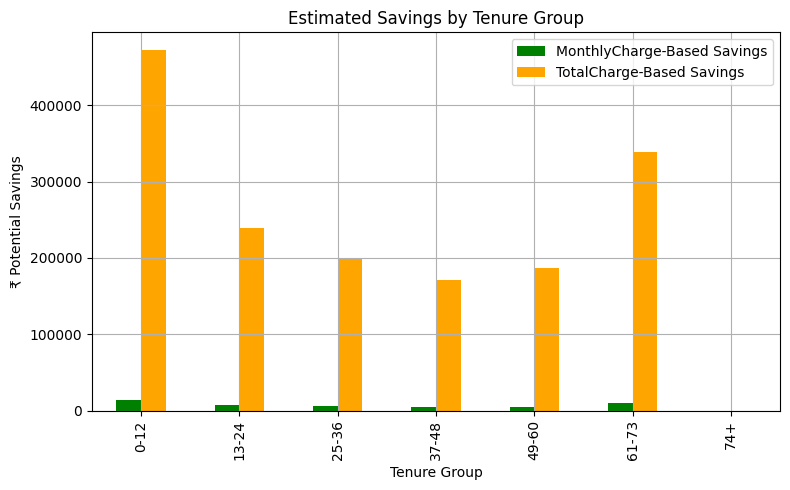

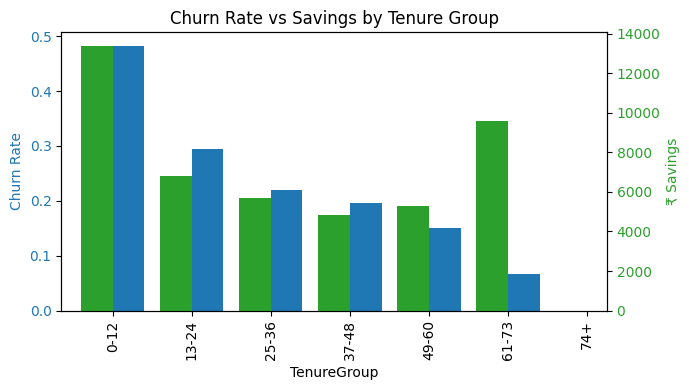

   TenureGroup RetentionRate        MonthlyChargeSavings  \
0         0-12            5%                    ₹6699.60   
1        13-24            5%                    ₹3390.27   
2        25-36            5%                    ₹2836.56   
3        37-48            5%                    ₹2422.09   
4        49-60            5%                    ₹2655.23   
5        61-73            5%                    ₹4802.08   
6          74+            5%  No customers in this group   
7         0-12           10%                   ₹13399.19   
8        13-24           10%                    ₹6780.55   
9        25-36           10%                    ₹5673.12   
10       37-48           10%                    ₹4844.17   
11       49-60           10%                    ₹5310.46   
12       61-73           10%                    ₹9604.16   
13         74+           10%  No customers in this group   
14        0-12           15%                   ₹20098.79   
15       13-24           15%            

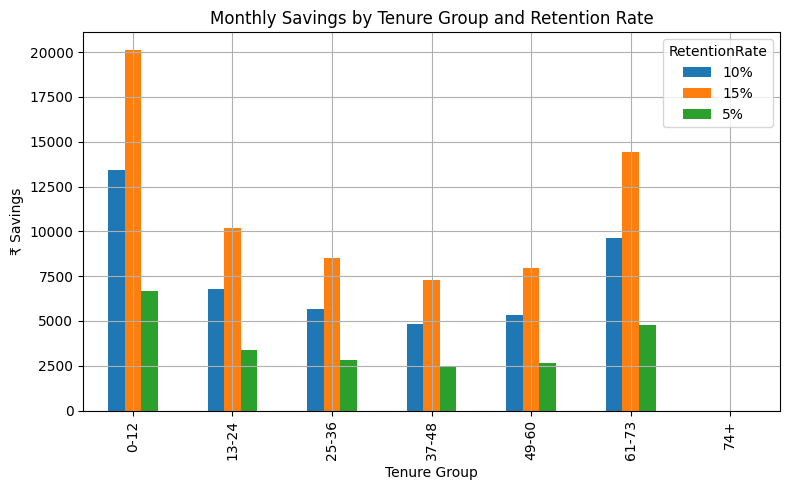

In [34]:
# Threshold Analysis Table
def threshold_metrics(y_true, y_probs, thresholds=np.arange(0.0, 1.01, 0.05)):
    results = []
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        support = len(y_test[y_test == 0]) + len(y_test[y_test == 1]) if len(y_test[y_test == 0]) + len(y_test[y_test == 1]) > 0 else 0
        results.append((thresh, precision, recall, f1, support))

    df_thresh = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1", "Support"])
    df_thresh.to_excel("threshold_analysis.xlsx", index=False)
    return df_thresh

# Run for Random Forest
threshold_df = threshold_metrics(y_test, y_rf_prob)
print(threshold_df)

# Feature Importance

importances = rf.feature_importances_
features = X_train.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = feature_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()
print("Top 10 Important Features:")
print(feature_df.sort_values(by='Importance', ascending=False).head(10))

# Revenue Impact Estimate

# Combine into DataFrame
savings_df = pd.DataFrame({
    'MonthlyCharge-Based Savings': savings_by_group,
    'TotalCharge-Based Savings': savings_by_group_long
})

# Plot
savings_df.plot(kind='bar', figsize=(8, 5), color=['green', 'orange'])
plt.title("Estimated Savings by Tenure Group")
plt.ylabel("₹ Potential Savings")
plt.xlabel("Tenure Group")
plt.grid(True)
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(7, 4))

color = 'tab:blue'
ax1.set_xlabel('Tenure Group')
ax1.set_ylabel('Churn Rate', color=color)
segment_churn.plot(kind='bar', ax=ax1, color=color, position=0, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('₹ Savings', color=color)
savings_by_group.plot(kind='bar', ax=ax2, color=color, position=1, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Churn Rate vs Savings by Tenure Group")
plt.tight_layout()
plt.show()

# Calculate averages
avg_monthly = df_encoded['MonthlyCharges'].mean()
avg_total = df_encoded['TotalCharges'].mean()

# Define retention rates and tenure groups
retention_rates = [0.05, 0.10, 0.15]
tenure_order = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-73', '74+']

# Build combined savings table
combined_rows = []
for rate in retention_rates:
    for group in tenure_order:
        group_size = df_encoded[df_encoded['TenureGroup'] == group].shape[0]
        if group_size > 0:
            monthly_savings = avg_monthly * group_size * rate
            total_savings = avg_total * group_size * rate
            combined_rows.append({
                'TenureGroup': group,
                'RetentionRate': f'{int(rate*100)}%',
                'MonthlyChargeSavings': f'₹{monthly_savings:.2f}',
                'TotalChargeSavings': f'₹{total_savings:.2f}'
            })
        else:
            combined_rows.append({
                'TenureGroup': group,
                'RetentionRate': f'{int(rate*100)}%',
                'MonthlyChargeSavings': 'No customers in this group',
                'TotalChargeSavings': 'No customers in this group'
            })

# Create DataFrame and display
combined_df = pd.DataFrame(combined_rows)
print(combined_df)

combined_df.to_excel("combined_savings_summary.xlsx", index=False)

# Load combined savings summary
combined_df = pd.read_excel("combined_savings_summary.xlsx")

# Convert savings columns to numeric (remove ₹ and commas)
combined_df['MonthlyChargeSavings'] = combined_df['MonthlyChargeSavings'].replace('[₹,]', '', regex=True).replace('No customers in this group', 0).astype(float)
combined_df['TotalChargeSavings'] = combined_df['TotalChargeSavings'].replace('[₹,]', '', regex=True).replace('No customers in this group', 0).astype(float)

# Pivot for grouped bar chart
pivot_df = combined_df.pivot(index='TenureGroup', columns='RetentionRate', values='MonthlyChargeSavings')

# Plot
pivot_df.plot(kind='bar', figsize=(8, 5))
plt.title("Monthly Savings by Tenure Group and Retention Rate")
plt.ylabel("₹ Savings")
plt.xlabel("Tenure Group")
plt.grid(True)
plt.tight_layout()
plt.savefig("savings_grouped_bar_chart.png")
plt.show()
